In [2]:
import wandb
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import scipy
import tree
import json
import glob
fm.fontManager.addfont('./times.ttf')
fm.fontManager.addfont('./times_Italic.ttf')

In [6]:
jobs = {
    1: [
        "Cheetah",
        "Cheetah Dummy",
        "Cheetah Baseline",
    ], # online dpo
    2: [
        "Hopper",
        "Hopper Dummy",
        "Hopper Baseline"
    ], # sea-dpo without MAP
    3: [
        "Walker",
        "Walker Dummy",
        "Walker Baseline",
    ], # sea-dpo
}

def get_no(name):
    for k,v in jobs.items():
        if name in v:
            return k
        
api = wandb.Api(timeout=180)
save_dir = "./analysis_data"
runs = api.runs("zichang_team/hil_iq")
data_list = []
cfg_list = []

features_of_interest = ["eval/episode_reward_0", "eval/episode_reward_10",  "eval/episode_reward_20", "_step"] # "eval/episode_reward_0", "eval/episode_reward_10", "eval/episode_reward_20",  "eval/episode"
flatten_fns = tree.flatten(jobs)
os.makedirs(save_dir, exist_ok=True)
for run in tqdm.tqdm(runs):
    cfg = run.config
    if run.name in flatten_fns:
        name = run.name + f" {cfg['_content']['seed']}"
        print(name)
        if not os.path.exists(f"{save_dir}/{name}.csv"):
        # if True:
            data = run.history(keys=features_of_interest, samples=100)
            data = run.history(keys=features_of_interest)
            full_history = run.history()
            # print(full_history)
            data["seed"] = cfg['_content']['seed']
            data["run_name"] = run.name
            
            method = get_no(name)
            
            # data["method"] = method
            data.to_csv(f"{save_dir}/{name}.csv")

  0%|          | 0/164 [00:00<?, ?it/s]

Cheetah Baseline 1
Walker Baseline 2
Cheetah Baseline 3
Cheetah Baseline 2
Walker Baseline 3
Hopper Baseline 2
Hopper Baseline 3


 31%|███       | 51/164 [00:00<00:00, 133.41it/s]

Walker Baseline 1
Hopper Baseline 1
Cheetah 1
Cheetah Dummy 3
Hopper Dummy 3
Hopper Dummy 2
Hopper Dummy 1
Walker Dummy 3
Walker 3
Hopper 3
Walker Dummy 2
Walker 2
Hopper 2
Walker Dummy 1
Walker 1
Hopper 1
Cheetah Dummy 2
Cheetah Dummy 1
Cheetah 3
Cheetah 2


100%|██████████| 164/164 [00:01<00:00, 131.53it/s]


In [3]:
jobs_gcpc = {
    1: [
        "Cheetah GCPC",
        "Cheetah GCPC-NR"
    ], # online dpo
    2: [
        "Hopper GCPC",
        "Hopper GCPC-NR"
    ], # sea-dpo without MAP
    3: [
        "Walker GCPC",
        "Walker GCPC-NR"
    ], # sea-dpo
}

def get_no(name):
    for k,v in jobs_gcpc.items():
        if name in v:
            return k
        
api = wandb.Api(timeout=30)
save_dir = "./analysis_data"
runs = api.runs("zichang_team/gcpc")
data_list = []
cfg_list = []

features_of_interest = ["eval/episode_reward_0", "eval/episode_reward_10", "eval/episode_reward_20", "trainer/global_step"]
flatten_fns = tree.flatten(jobs_gcpc)
os.makedirs(save_dir, exist_ok=True)

for run in tqdm.tqdm(runs):
    cfg = run.config
    if run.name in flatten_fns:
        name = run.name + f" {cfg['seed']}"
        print(name)
        # if True:
        if not os.path.exists(f"{save_dir}/{name}.csv"):
            data = run.history(keys=features_of_interest)

            # Rounding "trainer/global_step" to the nearest 10000
            data["_step"] = data["trainer/global_step"].round(-4)

            # Drop duplicates to keep the first occurrence of each unique _step
            data = data.drop_duplicates(subset=["_step"], keep="first")

            # Add additional data
            data["seed"] = cfg['seed']
            data["run_name"] = run.name
            
            method = get_no(name)

            # Save the modified data
            data.to_csv(f"{save_dir}/{name}.csv")


  0%|          | 0/72 [00:00<?, ?it/s]

Cheetah GCPC-NR 2


  3%|▎         | 2/72 [00:00<00:22,  3.15it/s]

Cheetah GCPC-NR 1


  4%|▍         | 3/72 [00:01<00:29,  2.36it/s]

Cheetah GCPC-NR 3


  6%|▌         | 4/72 [00:01<00:35,  1.94it/s]

Walker GCPC-NR 2


  7%|▋         | 5/72 [00:02<00:37,  1.78it/s]

Walker GCPC-NR 3


  8%|▊         | 6/72 [00:03<00:37,  1.76it/s]

Walker GCPC-NR 1


 10%|▉         | 7/72 [00:03<00:37,  1.73it/s]

Cheetah GCPC 2


 11%|█         | 8/72 [00:04<00:38,  1.65it/s]

Cheetah GCPC 1


 12%|█▎        | 9/72 [00:04<00:38,  1.66it/s]

Cheetah GCPC 3


 14%|█▍        | 10/72 [00:05<00:36,  1.69it/s]

Walker GCPC 2


 15%|█▌        | 11/72 [00:06<00:35,  1.72it/s]

Walker GCPC 3


 17%|█▋        | 12/72 [00:06<00:34,  1.72it/s]

Walker GCPC 1


 18%|█▊        | 13/72 [00:07<00:35,  1.68it/s]

Hopper GCPC-NR 2


 22%|██▏       | 16/72 [00:09<00:36,  1.54it/s]

Hopper GCPC-NR 1


 24%|██▎       | 17/72 [00:11<00:52,  1.04it/s]

Hopper GCPC-NR 3


 25%|██▌       | 18/72 [00:13<01:06,  1.23s/it]

Hopper GCPC 1


 26%|██▋       | 19/72 [00:15<01:19,  1.49s/it]

Hopper GCPC 3


 28%|██▊       | 20/72 [00:19<01:44,  2.01s/it]

Hopper GCPC 2


100%|██████████| 72/72 [00:24<00:00,  2.94it/s]


In [7]:
fns = glob.glob(f"{save_dir}/*.csv")
dfs = [pd.read_csv(fn, index_col=0) for fn in fns]
df = pd.concat(dfs)
df

,_step,eval/episode_reward_0,eval/episode_reward_10,eval/episode_reward_20,seed,run_name,trainer/global_step
0,0.0,-22.990557,-10.626046,-3.455580,2,Cheetah Baseline,NaN
1,20000.0,696.066589,402.836182,-252.709167,2,Cheetah Baseline,NaN
2,40000.0,193.329407,433.943512,23.879749,2,Cheetah Baseline,NaN
3,60000.0,545.088745,2575.223877,2160.580811,2,Cheetah Baseline,NaN
4,80000.0,611.713928,2407.296387,1504.446411,2,Cheetah Baseline,NaN
...,...,...,...,...,...,...,...
95,950000.0,2665.472168,4036.035156,5875.361816,1,Walker Dummy,NaN
96,960000.0,1392.477295,3952.850586,5735.452637,1,Walker Dummy,NaN
97,970000.0,2397.189697,3819.690186,5286.079102,1,Walker Dummy,NaN
98,980000.0,2487.331543,3551.015137,5850.267090,1,Walker Dummy,NaN


In [63]:
# Define the run names and the columns of interest
run_names = ["Cheetah", "Cheetah Dummy", "Cheetah Baseline"]
columns_of_interest = ["eval/episode_reward_0", "eval/episode_reward_10", "eval/episode_reward_20"]

# # Initialize arrays to hold the last 20 values for each run_name
# rewards_arrays = {name: [] for name in run_names}

# # Iterate over each run name and collect the last 20 rows
# for run_name in run_names:
#     # Filter the DataFrame for the current run name
#     filtered_df = df[df['run_name'] == run_name]
    
#     # Get the last 20 rows for the specified columns
#     last_20 = filtered_df[columns_of_interest].tail(20)
    
#     # Append the last 20 rows to the corresponding array
#     rewards_arrays[run_name] = last_20.values.tolist()

# Define the run names of interest
run_names = ["Cheetah", "Cheetah Dummy", "Cheetah Baseline"]

# Initialize dictionaries to store means and stds
mean_values = {}
std_values = {}

# Loop through each run name to calculate mean and std for each reward column
for run_name in run_names:
    # Filter the DataFrame by run_name
    filtered_df = df[df['run_name'] == run_name]
    
    # Calculate the mean and std for each specified column if there are at least 20 rows
    if len(filtered_df) >= 20:
        mean_values[run_name] = {
            "eval/episode_reward_0": filtered_df["eval/episode_reward_0"].iloc[-20:].mean(),
            "eval/episode_reward_10": filtered_df["eval/episode_reward_10"].iloc[-20:].mean(),
            "eval/episode_reward_20": filtered_df["eval/episode_reward_20"].iloc[-20:].mean(),
        }
        
        std_values[run_name] = {
            "eval/episode_reward_0": filtered_df["eval/episode_reward_0"].iloc[-20:].std(),
            "eval/episode_reward_10": filtered_df["eval/episode_reward_10"].iloc[-20:].std(),
            "eval/episode_reward_20": filtered_df["eval/episode_reward_20"].iloc[-20:].std(),
        }

# Print the mean and std values
print("Mean values:")
for run_name, means in mean_values.items():
    print(f"{run_name}: {means}")

print("\nStandard deviation values:")
for run_name, stds in std_values.items():
    print(f"{run_name}: {stds}")

Mean values:
Cheetah: {'eval/episode_reward_0': 2105.144073486328, 'eval/episode_reward_10': 4159.395068359375, 'eval/episode_reward_20': 5517.253149414062}
Cheetah Dummy: {'eval/episode_reward_0': 2276.7092041015626, 'eval/episode_reward_10': 4193.898864746094, 'eval/episode_reward_20': 5789.89755859375}
Cheetah Baseline: {'eval/episode_reward_0': 1856.9581787109375, 'eval/episode_reward_10': 4091.7243041992188, 'eval/episode_reward_20': 1741.4608278274536}

Standard deviation values:
Cheetah: {'eval/episode_reward_0': 29.803785008479863, 'eval/episode_reward_10': 39.21481102972709, 'eval/episode_reward_20': 454.6882382948048}
Cheetah Dummy: {'eval/episode_reward_0': 19.415643666271905, 'eval/episode_reward_10': 45.70696019810034, 'eval/episode_reward_20': 396.92933921917114}
Cheetah Baseline: {'eval/episode_reward_0': 46.22512099802585, 'eval/episode_reward_10': 157.1162518419185, 'eval/episode_reward_20': 1166.5159960047738}


In [66]:
import glob
import pandas as pd
import numpy as np

# Load CSV files into DataFrames
fns = glob.glob(f"{save_dir}/*.csv")
dfs = [pd.read_csv(fn, index_col=0) for fn in fns]
df = pd.concat(dfs)

# Define the run names and corresponding file names
run_names = ["Cheetah", "Cheetah Dummy", "Cheetah Baseline"]
file_names = ["../decoder/csv/cheetah/s1.csv", "../decoder/csv/cheetah/d1.csv", "../decoder/csv/cheetah/b1.csv"]

# Initialize a list to hold the returns
returns = []

# Loop through each run name to collect the last 20 rows of each reward column
for run_name in run_names:
    # Filter the DataFrame by run_name
    filtered_df = df[df['run_name'] == run_name]
    
    # Collect the last 20 values for each reward column
    if len(filtered_df) >= 20:
        last_20_0 = filtered_df["eval/episode_reward_0"].iloc[-20:].values
        last_20_10 = filtered_df["eval/episode_reward_10"].iloc[-20:].values
        last_20_20 = filtered_df["eval/episode_reward_20"].iloc[-20:].values
        
        # Append these arrays to the returns list
        returns.append(last_20_0)
        returns.append(last_20_10)
        returns.append(last_20_20)

# Save the returns to CSV files
# Create a DataFrame for each run and save it
for i, return_values in enumerate(returns):
    df_return = pd.DataFrame(return_values, columns=["Returns"])
    # file = "../decoder/csv/cheetah/" + file_names[i]
    df_return.to_csv(file, index=False)

print("Returns saved to CSV files:")
for file in file_names:
    file = "../decoder/csv/cheetah/" + file
    print(f"- {file}")


FileNotFoundError: [Errno 2] No such file or directory: '../decoder/csv/cheetah/../decoder/csv/cheetah/b1.csv'

In [ ]:
# Define the run names and the columns of interest
run_names = ["Cheetah", "Cheetah Dummy", "Cheetah Baseline"]
columns_of_interest = ["eval/episode_reward_0", "eval/episode_reward_10", "eval/episode_reward_20"]

# # Initialize arrays to hold the last 20 values for each run_name
rewards_arrays = {name: [] for name in run_names}

# Iterate over each run name and collect the last 20 rows
for run_name in run_names:
    # Filter the DataFrame for the current run name
    filtered_df = df[df['run_name'] == run_name]

    # Get the last 20 rows for the specified columns
    last_20 = filtered_df[columns_of_interest].tail(20)

    # Append the last 20 rows to the corresponding array
    rewards_arrays[run_name] = last_20.values.tolist()
print(f"Length of rewards_arrays: {len(rewards_arrays)}")
file_names = ["../decoder/csv/cheetah/s1.csv", "../decoder/csv/cheetah/d1.csv", "../decoder/csv/cheetah/b1.csv"]


## High

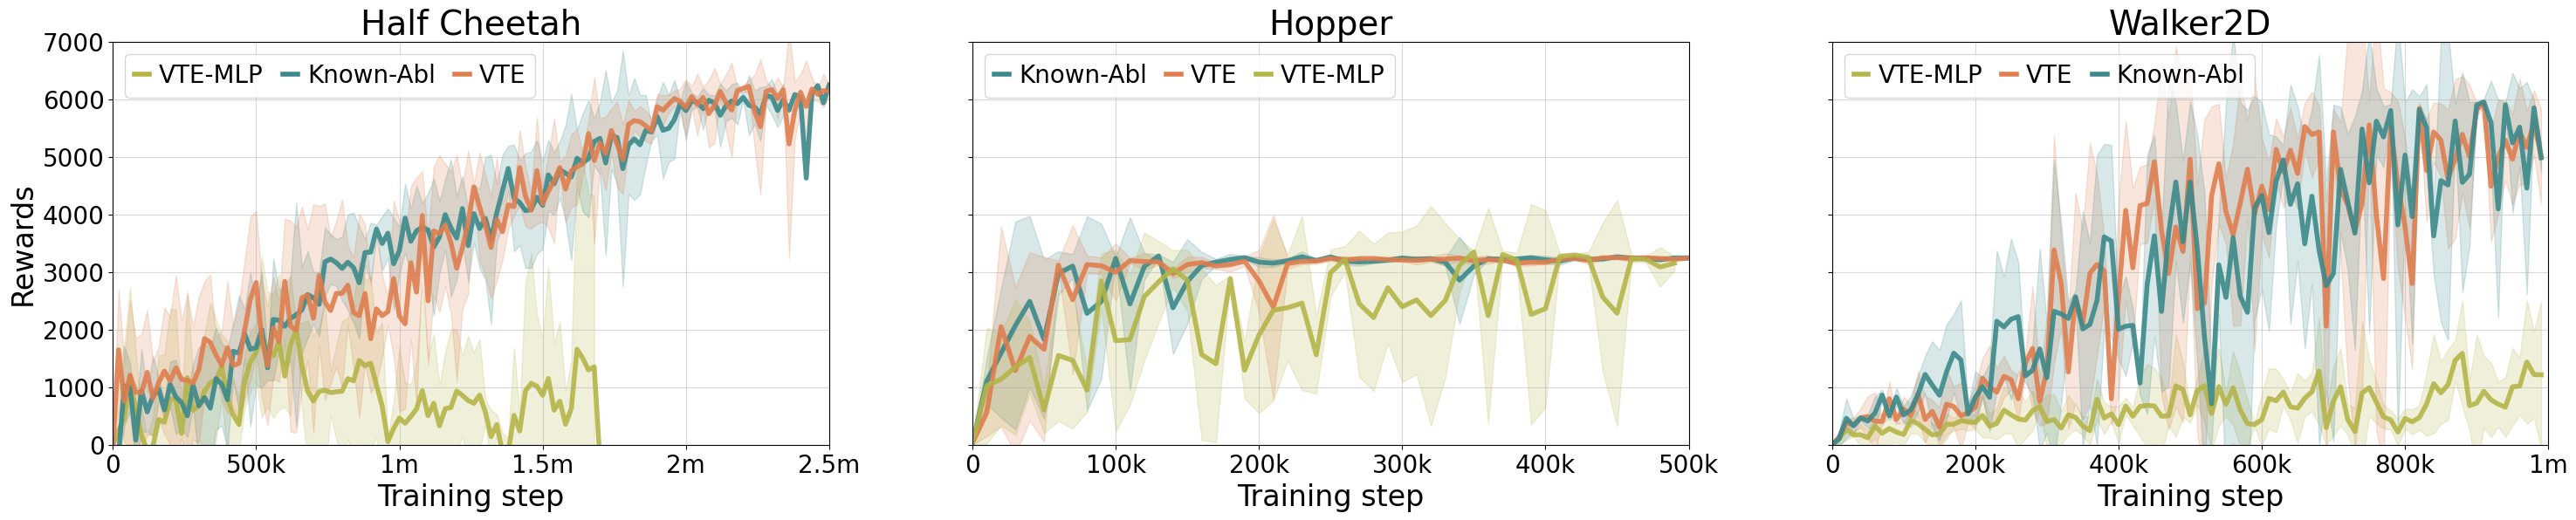

In [43]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

# hue_order = [
#     "offline",
#     "online",
#     "xpo",
#     "apl",
#     "sea"
# ]
methods_to_color = {
    # Hopper Entries (These remain unchanged)
    "Hopper": (223/255, 126/255, 79/255),  # RGBA with 0.15 alpha for lighter shadow
    "Hopper Dummy": (60/255, 137/255, 138/255),
    "Hopper Baseline": (180/255, 180/255, 73/255),

    # Cheetah Entries (Updated to match Hopper colors)
    "Cheetah": (223/255, 126/255, 79/255),
    "Cheetah Dummy": (60/255, 137/255, 138/255),
    "Cheetah Baseline": (180/255, 180/255, 73/255),

    # Walker Entries (Updated to match Hopper colors)
    "Walker": (223/255, 126/255, 79/255),
    "Walker Dummy": (60/255, 137/255, 138/255),
    "Walker Baseline": (180/255, 180/255, 73/255),

    "GCPC": (223/255, 126/255, 79/255),
    "GCPC-NR": (60/255, 137/255, 138/255),
}


# methods_to_labels= {
#     "offline": "Offline",
#     "online": "Online",
#     "sea": "SEA",
#     "xpo": "XPO",
#     "apl": "APL"
# }

# g = sns.FacetGrid(df, row="dap", col="scale", hue="method", palette=methods_to_color,hue_order=hue_order,col_order=["1B", "2.8B", "6.9B"], row_order=["DPO", "IPO", 'SLiC'], sharey=True, margin_titles=True, aspect=3/2, despine=False)

# g.map(sns.lineplot, "misc/query_step", "eval/rm_win_rate_prob", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2))
# g.set_titles(col_template="Pythia {col_name}", row_template="{row_name}")

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
fig.set_figwidth(fig.get_figwidth() * 2)

for i, ax in enumerate(axes):
    data_of_interest = jobs[i+1]
    ax=sns.lineplot(data=df[df.run_name.isin(data_of_interest)], x="_step", y="eval/episode_reward_20", hue="run_name", alpha=.9, dashes=False,linewidth=4, errorbar=('se', 2), ax=ax,
    palette=methods_to_color,
    # err_style="bars"
    # hue_order=hue_order
                    )
    if i == 0:
        ax.set_title("Half Cheetah", fontsize=28)
        ax.set_xlim(0, 25e5)
        ax.set_ylim(0, 7e3)
        ax.set_xticks([0, 5e5, 10e5, 15e5, 20e5, 25e5],
        ["0", "500k", "1m", "1.5m", "2m", "2.5m"])
    elif i == 1:
        ax.set_title("Hopper", fontsize=28)
        ax.set_xlim(0, 500000)
        ax.set_ylim(0, 5000)
        ax.set_xticks([0, 100000, 200000, 300000, 400000, 500000],
        ["0", "100k", "200k", "300k", "400k", "500k"])
    else:
        ax.set_title("Walker2D", fontsize=28)
        ax.set_xlim(0, 1e6)
        ax.set_ylim(0, 7e3)
        ax.set_xticks([0, 200000, 400000, 600000, 800000, 1e6],
        ["0", "200k", "400k", "600k", "800k", "1m"])
    # Ensure legend is created
    handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last axis
    # Create a mapping from original labels to desired labels
    label_mapping = {
        "Hopper": "VTE",
        "Hopper Dummy": "Known-Abl",
        "Hopper Baseline": "VTE-MLP",
        "Cheetah": "VTE",
        "Cheetah Dummy": "Known-Abl",
        "Cheetah Baseline": "VTE-MLP",
        "Walker": "VTE",
        "Walker Dummy": "Known-Abl",
        "Walker Baseline": "VTE-MLP",
        "GCPC": "GCPC",
        "GCPC-NR": "GCPC-NR"
    }
    new_labels = [label_mapping.get(label, label) for label in labels]
    ax.legend(handles, new_labels , title='Methods', loc='upper center', ncol=4, handlelength=3)
    # Additionally, ensure thicker legend lines with this loop:
    for legend_line in ax.get_legend().get_lines():
        legend_line.set_linewidth(4.0)  # Increase linewidth for better visibility
    sns.move_legend(
        ax, "upper left",
        # bbox_to_anchor=(0.45, -0.07), 
        ncol=3, 
        title=None, 
        frameon=True,
        # labels=[methods_to_labels[k] for k in hue_order],
        handletextpad=0.4,
        handlelength=0.6,
        columnspacing=0.8
    )
    ax.set_ylabel('Rewards', fontsize=24)
    ax.set_xlabel('Training step', fontsize=24)
    
    # ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
    ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
    fig.savefig("pdf/high_ability_level_train.pdf", bbox_inches="tight")

## Medium ability level

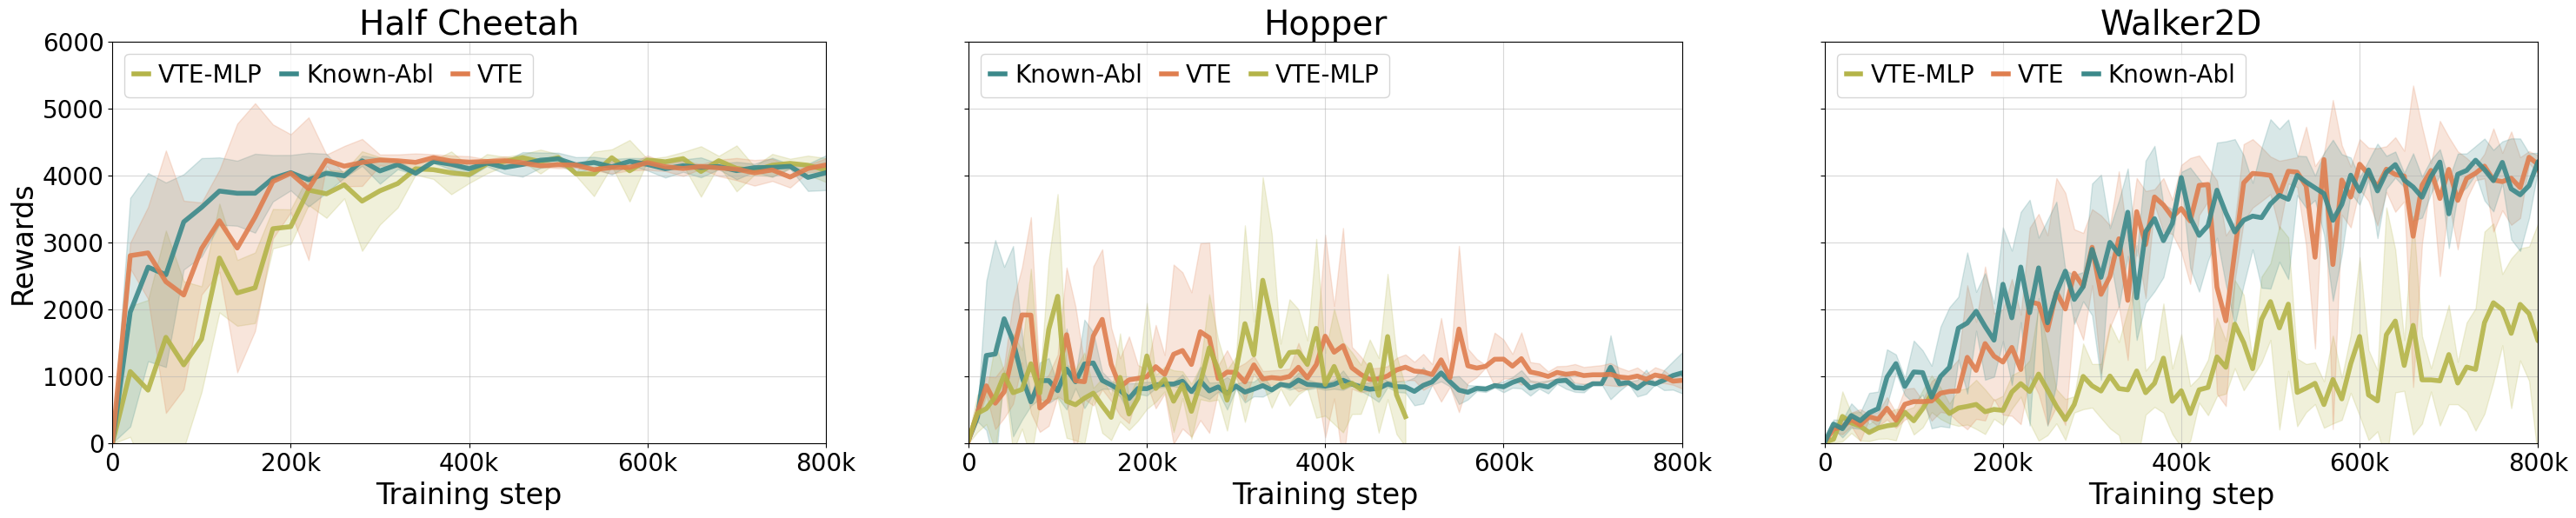

In [112]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

# hue_order = [
#     "offline",
#     "online",
#     "xpo",
#     "apl",
#     "sea"
# ]
# methods_to_color = {
#     # Hopper Entries (These remain unchanged)
#     "Hopper": (223/255, 126/255, 79/255, 0.15),  # RGBA with 0.15 alpha for lighter shadow
#     "Hopper Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Hopper Baseline": (180/255, 180/255, 73/255, 0.15),

#     # Cheetah Entries (Updated to match Hopper colors)
#     "Cheetah": (223/255, 126/255, 79/255, 0.15),
#     "Cheetah Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Cheetah Baseline": (180/255, 180/255, 73/255, 0.15),

#     # Walker Entries (Updated to match Hopper colors)
#     "Walker": (223/255, 126/255, 79/255, 0.15),
#     "Walker Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Walker Baseline": (180/255, 180/255, 73/255, 0.15),

#     "GCPC": (223/255, 126/255, 79/255, 0.15),
#     "GCPC-NR": (60/255, 137/255, 138/255, 0.15),
# }


# methods_to_labels= {
#     "offline": "Offline",
#     "online": "Online",
#     "sea": "SEA",
#     "xpo": "XPO",
#     "apl": "APL"
# }

# g = sns.FacetGrid(df, row="dap", col="scale", hue="method", palette=methods_to_color,hue_order=hue_order,col_order=["1B", "2.8B", "6.9B"], row_order=["DPO", "IPO", 'SLiC'], sharey=True, margin_titles=True, aspect=3/2, despine=False)

# g.map(sns.lineplot, "misc/query_step", "eval/rm_win_rate_prob", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2))
# g.set_titles(col_template="Pythia {col_name}", row_template="{row_name}")

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
fig.set_figwidth(fig.get_figwidth() * 2)

for i, ax in enumerate(axes):
    data_of_interest = jobs[i+1]
    ax=sns.lineplot(data=df[df.run_name.isin(data_of_interest)], x="_step", y="eval/episode_reward_10", hue="run_name", alpha=.9, dashes=False,linewidth=4, errorbar=('se', 2), ax=ax,
    palette=methods_to_color,
    # err_style="bars"
    # hue_order=hue_order
                    )
    if i == 0:
        ax.set_title("Half Cheetah", fontsize=28)
        ax.set_xlim(0, 800000)  # Set x limit to 800k
        ax.set_ylim(0, 6000)
        ax.set_xticks([0, 200000, 400000, 600000, 800000], 
                    ["0", "200k", "400k", "600k", "800k"])  # Adjust ticks

    elif i == 1:
        ax.set_title("Hopper", fontsize=28)
        ax.set_xlim(0, 800000)  # Set x limit to 800k
        ax.set_ylim(0, 6000)
        ax.set_xticks([0, 200000, 400000, 600000, 800000], 
                    ["0", "200k", "400k", "600k", "800k"])  # Adjust ticks

    else:
        ax.set_title("Walker2D", fontsize=28)
        ax.set_xlim(0, 800000)  # Set x limit to 800k
        ax.set_ylim(0, 6000)
        ax.set_xticks([0, 200000, 400000, 600000, 800000], 
                    ["0", "200k", "400k", "600k", "800k"])  # Adjust ticks

    # Ensure legend is created
    handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last axis
    # Create a mapping from original labels to desired labels
    label_mapping = {
        "Hopper": "VTE",
        "Hopper Dummy": "Known-Abl",
        "Hopper Baseline": "VTE-MLP",
        "Cheetah": "VTE",
        "Cheetah Dummy": "Known-Abl",
        "Cheetah Baseline": "VTE-MLP",
        "Walker": "VTE",
        "Walker Dummy": "Known-Abl",
        "Walker Baseline": "VTE-MLP",
        "GCPC": "GCPC",
        "GCPC-NR": "GCPC-NR"
    }
    new_labels = [label_mapping.get(label, label) for label in labels]
    ax.legend(handles, new_labels , title='Methods', loc='upper center', ncol=4, handlelength=3)
    # Additionally, ensure thicker legend lines with this loop:
    for legend_line in ax.get_legend().get_lines():
        legend_line.set_linewidth(4.0)  # Increase linewidth for better visibility
    sns.move_legend(
        ax, "upper left",
        # bbox_to_anchor=(0.45, -0.07), 
        ncol=3, 
        title=None, 
        frameon=True,
        # labels=[methods_to_labels[k] for k in hue_order],
        handletextpad=0.4,
        handlelength=0.6,
        columnspacing=0.8
    )
    ax.set_ylabel('Rewards', fontsize=24)
    ax.set_xlabel('Training step', fontsize=24)
    
    # ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
    ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
    fig.savefig("pdf/medium_ability_level_train.pdf", bbox_inches="tight")

## Walker Evaluation Graph

['Walker', 'Walker Dummy', 'Walker Baseline', 'Walker GCPC', 'Walker GCPC-NR', 'Walker GCPC', 'Walker GCPC-NR', 'Walker GCPC', 'Walker GCPC-NR']


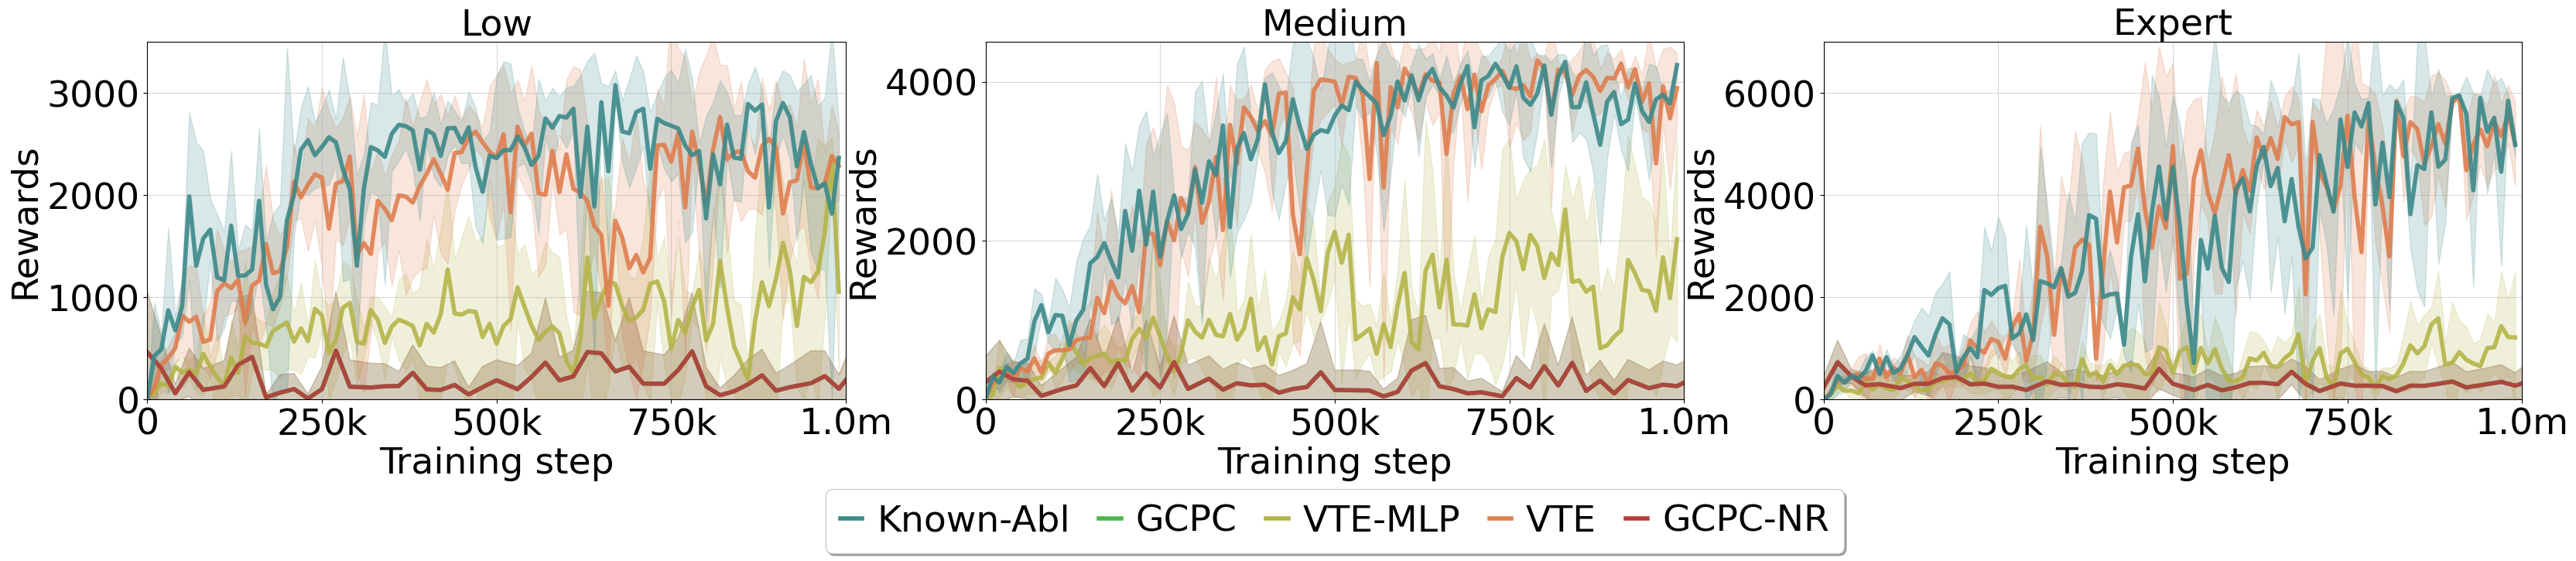

In [18]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

# hue_order = [
#     "offline",
#     "online",
#     "xpo",
#     "apl",
#     "sea"
# ]
methods_to_color = {
    # Hopper Entries (These remain unchanged)
    "Hopper": (223/255, 126/255, 79/255),  # RGBA with 0.15 alpha for lighter shadow
    "Hopper Dummy": (60/255, 137/255, 138/255),
    "Hopper Baseline": (180/255, 180/255, 73/255),

    # Cheetah Entries (Updated to match Hopper colors)
    "Cheetah": (223/255, 126/255, 79/255),
    "Cheetah Dummy": (60/255, 137/255, 138/255),
    "Cheetah Baseline": (180/255, 180/255, 73/255),

    # Walker Entries (Updated to match Hopper colors)
    "Walker": (223/255, 126/255, 79/255),
    "Walker Dummy": (60/255, 137/255, 138/255),
    "Walker Baseline": (180/255, 180/255, 73/255),

    "Hopper GCPC": (80/255, 180/255, 79/255),
    "Hopper GCPC-NR": (180/255, 60/255, 60/255),

    "Cheetah GCPC": (80/255, 180/255, 79/255),
    "Cheetah GCPC-NR": (180/255, 60/255, 60/255),

    "Walker GCPC": (80/255, 180/255, 79/255),
    "Walker GCPC-NR": (180/255, 60/255, 60/255),
}
# methods_to_color = {
#     # Hopper Entries (These remain unchanged)
#     "Hopper": (223/255, 126/255, 79/255, 0.15),  # RGBA with 0.15 alpha for lighter shadow
#     "Hopper Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Hopper Baseline": (180/255, 180/255, 73/255, 0.15),

#     # Cheetah Entries (Updated to match Hopper colors)
#     "Cheetah": (223/255, 126/255, 79/255, 0.15),
#     "Cheetah Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Cheetah Baseline": (180/255, 180/255, 73/255, 0.15),

#     # Walker Entries (Updated to match Hopper colors)
#     "Walker": (223/255, 126/255, 79/255, 0.15),
#     "Walker Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Walker Baseline": (180/255, 180/255, 73/255, 0.15),

#     "GCPC": (223/255, 126/255, 79/255, 0.15),
#     "GCPC-NR": (60/255, 137/255, 138/255, 0.15),
# }


# methods_to_labels= {
#     "offline": "Offline",
#     "online": "Online",
#     "sea": "SEA",
#     "xpo": "XPO",
#     "apl": "APL"
# }

# g = sns.FacetGrid(df, row="dap", col="scale", hue="method", palette=methods_to_color,hue_order=hue_order,col_order=["1B", "2.8B", "6.9B"], row_order=["DPO", "IPO", 'SLiC'], sharey=True, margin_titles=True, aspect=3/2, despine=False)

# g.map(sns.lineplot, "misc/query_step", "eval/rm_win_rate_prob", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2))
# g.set_titles(col_template="Pythia {col_name}", row_template="{row_name}")
fontsize = 34
fig, axes = plt.subplots(1, 3, sharey=False, figsize=(18, 6))
# fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figwidth(fig.get_figwidth() * 2.2)
data_of_interest = jobs[3]+jobs_gcpc[3]
print(data_of_interest)
for i, ax in enumerate(axes):
    # data_of_interest = jobs[i+1]
    ax=sns.lineplot(data=df[df.run_name.isin(data_of_interest)], x="_step", y=f"eval/episode_reward_{i*10}", hue="run_name", alpha=.9, dashes=False,linewidth=4, errorbar=('se', 2), ax=ax,
    palette=methods_to_color,
    # err_style="bars"
    # hue_order=hue_order
                    )
    # if i == 0:
    #     ax.set_title("Half Cheetah", fontsize=28)
    #     ax.set_xlim(0, 1000000)  # Set x limit to 1000k
    #     ax.set_ylim(0, 3500)      # Set y limit to 3500
    #     ax.set_xticks([0, 200000, 400000, 600000, 800000, 1000000], 
    #                 ["0", "200k", "400k", "600k", "800k", "1.0m"])  # Adjust ticks

    # elif i == 1:
    #     ax.set_title("Hopper", fontsize=28)
    #     ax.set_title("Hopper", fontsize=28)
    #     ax.set_xlim(0, 400000)  # Set x limit to 400k
    #     ax.set_ylim(0, 3500)    # Set y limit to 3500
    #     ax.set_xticks([0, 100000, 200000, 300000, 400000], 
    #                 ["0", "100k", "200k", "300k", "400k"])  # Adjust ticks

    # else:
    #     ax.set_title("Walker2D", fontsize=28)
    #     ax.set_xlim(0, 1000000)  # Set x limit to 1000k
    #     ax.set_ylim(0, 3500)      # Set y limit to 3500
    #     ax.set_xticks([0, 200000, 400000, 600000, 800000, 1000000], 
    #                 ["0", "200k", "400k", "600k", "800k", "1.0m"])  # Adjust ticks

    if i == 0:
        ax.set_title("Low", fontsize=fontsize)
        ax.set_xlim(0, 1000000)
        ax.set_ylim(0, 3500)
        ax.set_xticks([0, 250000, 500000, 750000, 1000000])  # Five evenly spaced ticks
        ax.set_xticklabels(["0", "250k", "500k", "750k", "1.0m"], fontsize=fontsize)

    elif i == 1:
        ax.set_title("Medium", fontsize=fontsize)
        ax.set_xlim(0, 1000000)
        ax.set_ylim(0, 4500)
        ax.set_xticks([0, 250000, 500000, 750000, 1000000])  # Five evenly spaced ticks
        ax.set_xticklabels(["0", "250k", "500k", "750k", "1.0m"], fontsize=fontsize)

    else:
        ax.set_title("Expert", fontsize=fontsize)
        ax.set_xlim(0, 1000000)
        ax.set_ylim(0, 7000)
        ax.set_xticks([0, 250000, 500000, 750000, 1000000])  # Five evenly spaced ticks
        ax.set_xticklabels(["0", "250k", "500k", "750k", "1.0m"], fontsize=fontsize)



    ax.tick_params(axis='y', labelsize=fontsize)  # Set y-tick label size
    # Ensure legend is created

    # Ensure legend is created
    handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last axis
    # Create a mapping from original labels to desired labels
    label_mapping = {
        "Hopper": "VTE",
        "Hopper Dummy": "Known-Abl",
        "Hopper Baseline": "VTE-MLP",
        "Cheetah": "VTE",
        "Cheetah Dummy": "Known-Abl",
        "Cheetah Baseline": "VTE-MLP",
        "Walker": "VTE",
        "Walker Dummy": "Known-Abl",
        "Walker Baseline": "VTE-MLP",
        "Cheetah GCPC": "GCPC",
        "Cheetah GCPC-NR": "GCPC-NR",
        "Hopper GCPC": "GCPC",
        "Hopper GCPC-NR": "GCPC-NR",
        "Walker GCPC": "GCPC",
        "Walker GCPC-NR": "GCPC-NR"
    }
    # new_labels = [label_mapping.get(label, label) for label in labels]
    # ax.legend(handles, new_labels , title='Methods', loc='upper center', ncol=4, handlelength=3)
    # # Additionally, ensure thicker legend lines with this loop:
    # for legend_line in ax.get_legend().get_lines():
    #     legend_line.set_linewidth(4.0)  # Increase linewidth for better visibility
    # sns.move_legend(
    #     ax, "upper left",
    #     # bbox_to_anchor=(0.45, -0.07), 
    #     ncol=3, 
    #     title=None, 
    #     frameon=True,
    #     # labels=[methods_to_labels[k] for k in hue_order],
    #     handletextpad=0.4,
    #     handlelength=0.6,
    #     columnspacing=0.8
    # )
    if i == 1: 
        new_labels = [label_mapping.get(label, label) for label in labels]
        handles = [handles[-1]] + handles[:-1]
        new_labels = [new_labels[-1]] + new_labels[:-1]

        ax.legend(handles, new_labels , title='Methods', loc='upper center', ncol=4, handlelength=3)
        # ax.legend(legend,loc='upper center', bbox_to_anchor=(0.5, -0.1),
        #   fancybox=True, shadow=True, ncol=5, prop={'size': 50})
        # Additionally, ensure thicker legend lines with this loop:
        for legend_line in ax.get_legend().get_lines():
            legend_line.set_linewidth(4.0)  # Increase linewidth for better visibility
        sns.move_legend(
            ax, "upper center",
            # bbox_to_anchor=(0.45, -0.07), 
            ncol=5, 
            title=None, 
            frameon=True,
            # labels=[methods_to_labels[k] for k in hue_order],
            handletextpad=0.4,
            handlelength=0.6,
            columnspacing=0.8,
            bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, prop={'size': fontsize}
        )
    else:
        # remove legend:
        ax.get_legend().remove()
    ax.set_ylabel('Rewards', fontsize=fontsize)
    ax.set_xlabel('Training step', fontsize=fontsize)
    
    # ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
    ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
    fig.savefig("pdf/walker.pdf", bbox_inches="tight")

# Cheetah Evaluation Graph

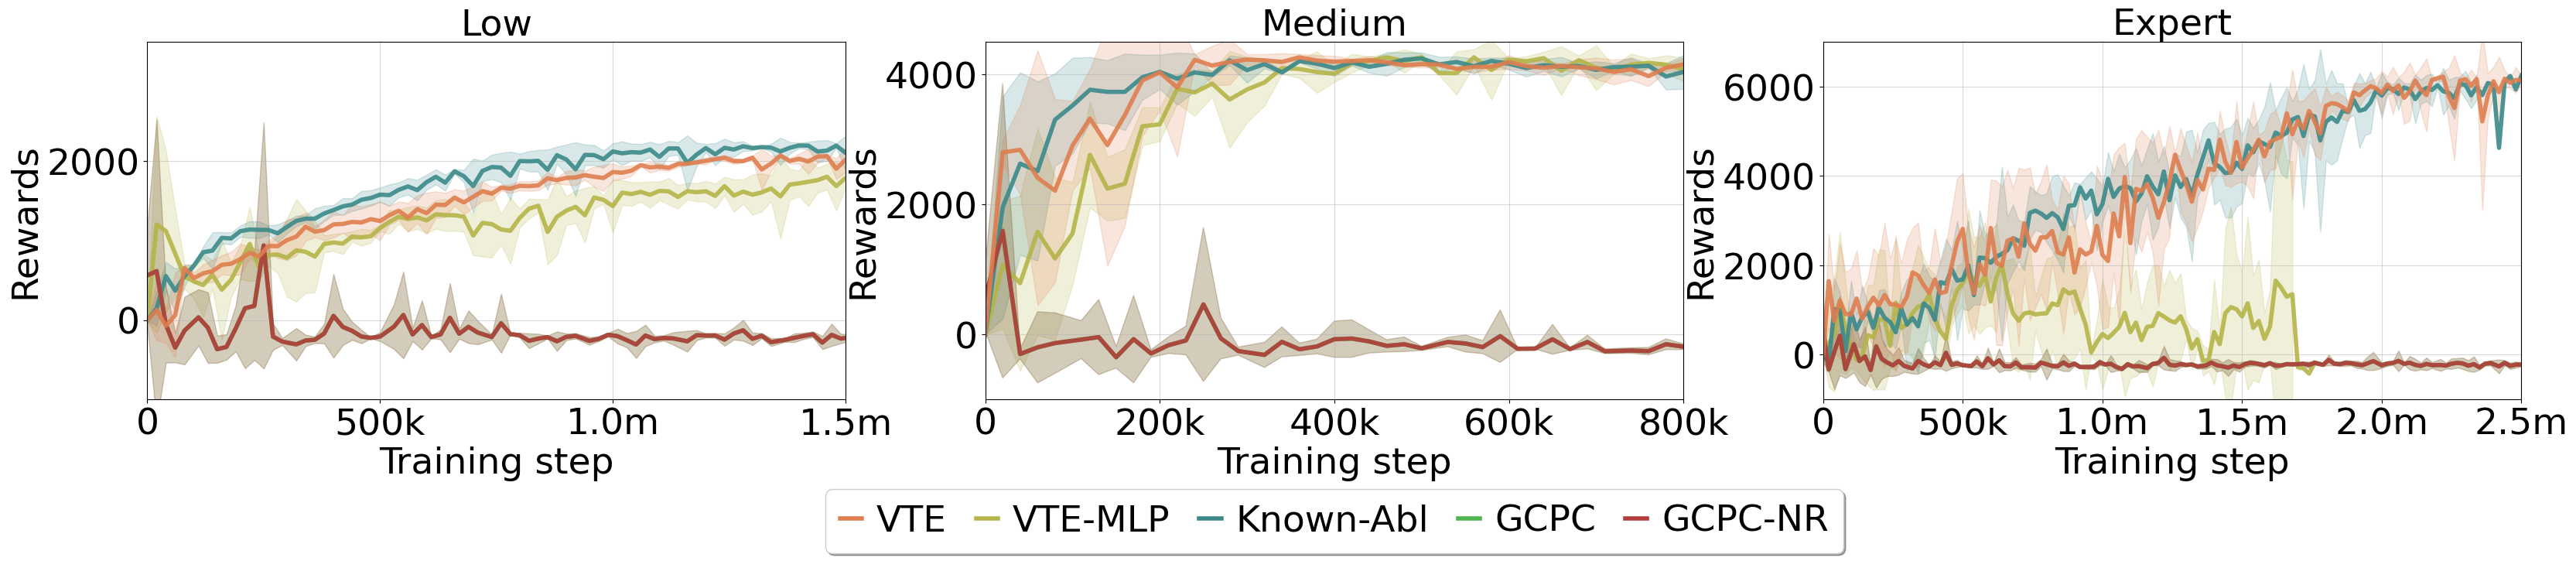

In [20]:
# Cheetah
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

# hue_order = [
#     "offline",
#     "online",
#     "xpo",
#     "apl",
#     "sea"
# ]
methods_to_color = {
    # Hopper Entries (These remain unchanged)
    "Hopper": (223/255, 126/255, 79/255),  # RGBA with 0.15 alpha for lighter shadow
    "Hopper Dummy": (60/255, 137/255, 138/255),
    "Hopper Baseline": (180/255, 180/255, 73/255),

    # Cheetah Entries (Updated to match Hopper colors)
    "Cheetah": (223/255, 126/255, 79/255),
    "Cheetah Dummy": (60/255, 137/255, 138/255),
    "Cheetah Baseline": (180/255, 180/255, 73/255),

    # Walker Entries (Updated to match Hopper colors)
    "Walker": (223/255, 126/255, 79/255),
    "Walker Dummy": (60/255, 137/255, 138/255),
    "Walker Baseline": (180/255, 180/255, 73/255),

    "Hopper GCPC": (80/255, 180/255, 79/255),
    "Hopper GCPC-NR": (180/255, 60/255, 60/255),

    "Cheetah GCPC": (80/255, 180/255, 79/255),
    "Cheetah GCPC-NR": (180/255, 60/255, 60/255),

    "Walker GCPC": (80/255, 180/255, 79/255),
    "Walker GCPC-NR": (180/255, 60/255, 60/255),
}
# methods_to_color = {
#     # Hopper Entries (These remain unchanged)
#     "Hopper": (223/255, 126/255, 79/255, 0.15),  # RGBA with 0.15 alpha for lighter shadow
#     "Hopper Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Hopper Baseline": (180/255, 180/255, 73/255, 0.15),

#     # Cheetah Entries (Updated to match Hopper colors)
#     "Cheetah": (223/255, 126/255, 79/255, 0.15),
#     "Cheetah Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Cheetah Baseline": (180/255, 180/255, 73/255, 0.15),

#     # Walker Entries (Updated to match Hopper colors)
#     "Walker": (223/255, 126/255, 79/255, 0.15),
#     "Walker Dummy": (60/255, 137/255, 138/255, 0.15),
#     "Walker Baseline": (180/255, 180/255, 73/255, 0.15),

#     "GCPC": (223/255, 126/255, 79/255, 0.15),
#     "GCPC-NR": (60/255, 137/255, 138/255, 0.15),
# }


# methods_to_labels= {
#     "offline": "Offline",
#     "online": "Online",
#     "sea": "SEA",
#     "xpo": "XPO",
#     "apl": "APL"
# }

# g = sns.FacetGrid(df, row="dap", col="scale", hue="method", palette=methods_to_color,hue_order=hue_order,col_order=["1B", "2.8B", "6.9B"], row_order=["DPO", "IPO", 'SLiC'], sharey=True, margin_titles=True, aspect=3/2, despine=False)

# g.map(sns.lineplot, "misc/query_step", "eval/rm_win_rate_prob", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2))
# g.set_titles(col_template="Pythia {col_name}", row_template="{row_name}")

fig, axes = plt.subplots(1, 3, sharey=False, figsize=(18, 6))
# fig.set_figwidth(fig.get_figwidth() * 2)
fig.set_figwidth(fig.get_figwidth() * 2.2)
data_of_interest = jobs[1]+jobs_gcpc[1]
for i, ax in enumerate(axes):
    # data_of_interest = jobs[i+1]
    ax=sns.lineplot(data=df[df.run_name.isin(data_of_interest)], x="_step", y=f"eval/episode_reward_{i*10}", hue="run_name", alpha=.9, dashes=False,linewidth=4, errorbar=('se', 2), ax=ax,
    palette=methods_to_color,
    # err_style="bars"
    # hue_order=hue_order
                    )
    # if i == 0:
    #     ax.set_title("Half Cheetah", fontsize=28)
    #     ax.set_xlim(0, 1000000)  # Set x limit to 1000k
    #     ax.set_ylim(0, 3500)      # Set y limit to 3500
    #     ax.set_xticks([0, 200000, 400000, 600000, 800000, 1000000], 
    #                 ["0", "200k", "400k", "600k", "800k", "1.0m"])  # Adjust ticks

    # elif i == 1:
    #     ax.set_title("Hopper", fontsize=28)
    #     ax.set_title("Hopper", fontsize=28)
    #     ax.set_xlim(0, 400000)  # Set x limit to 400k
    #     ax.set_ylim(0, 3500)    # Set y limit to 3500
    #     ax.set_xticks([0, 100000, 200000, 300000, 400000], 
    #                 ["0", "100k", "200k", "300k", "400k"])  # Adjust ticks

    # else:
    #     ax.set_title("Walker2D", fontsize=28)
    #     ax.set_xlim(0, 1000000)  # Set x limit to 1000k
    #     ax.set_ylim(0, 3500)      # Set y limit to 3500
    #     ax.set_xticks([0, 200000, 400000, 600000, 800000, 1000000], 
    #                 ["0", "200k", "400k", "600k", "800k", "1.0m"])  # Adjust ticks

    if i == 0:
        ax.set_title("Low", fontsize=fontsize)
        ax.set_xlim(0, 1500000)  # Set x limit to 1.5m
        ax.set_ylim(-1000, 3500)
        ax.set_xticks([0, 500000, 1000000, 1500000])  # Four evenly spaced ticks
        ax.set_xticklabels(["0", "500k", "1.0m", "1.5m"], fontsize=fontsize)

    elif i == 1:
        ax.set_title("Medium", fontsize=fontsize)
        ax.set_xlim(0, 800000)  # Set x limit to 800k
        ax.set_ylim(-1000, 4500)
        ax.set_xticks([0, 200000, 400000, 600000, 800000])  # Five evenly spaced ticks
        ax.set_xticklabels(["0", "200k", "400k", "600k", "800k"], fontsize=fontsize)

    else:
        ax.set_title("Expert", fontsize=fontsize)
        ax.set_xlim(0, 2500000)  # Set x limit to 2.5m
        ax.set_ylim(-1000, 7000)
        ax.set_xticks([0, 500000, 1000000, 1500000, 2000000, 2500000])  # Five evenly spaced ticks
        ax.set_xticklabels(["0", "500k", "1.0m", "1.5m", "2.0m", "2.5m"], fontsize=fontsize)





    ax.tick_params(axis='y', labelsize=fontsize)  # Set y-tick label size
    # Ensure legend is created

    # Ensure legend is created
    handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last axis
    # Create a mapping from original labels to desired labels
    label_mapping = {
        "Hopper": "VTE",
        "Hopper Dummy": "Known-Abl",
        "Hopper Baseline": "VTE-MLP",
        "Cheetah": "VTE",
        "Cheetah Dummy": "Known-Abl",
        "Cheetah Baseline": "VTE-MLP",
        "Walker": "VTE",
        "Walker Dummy": "Known-Abl",
        "Walker Baseline": "VTE-MLP",
        "Cheetah GCPC": "GCPC",
        "Cheetah GCPC-NR": "GCPC-NR",
        "Hopper GCPC": "GCPC",
        "Hopper GCPC-NR": "GCPC-NR",
        "Walker GCPC": "GCPC",
        "Walker GCPC-NR": "GCPC-NR"
    }
    # new_labels = [label_mapping.get(label, label) for label in labels]
    # ax.legend(handles, new_labels , title='Methods', loc='upper center', ncol=4, handlelength=3)
    # # Additionally, ensure thicker legend lines with this loop:
    # for legend_line in ax.get_legend().get_lines():
    #     legend_line.set_linewidth(4.0)  # Increase linewidth for better visibility
    # sns.move_legend(
    #     ax, "upper left",
    #     # bbox_to_anchor=(0.45, -0.07), 
    #     ncol=3, 
    #     title=None, 
    #     frameon=True,
    #     # labels=[methods_to_labels[k] for k in hue_order],
    #     handletextpad=0.4,
    #     handlelength=0.6,
    #     columnspacing=0.8
    # )
    if i == 1: 
        new_labels = [label_mapping.get(label, label) for label in labels]
        handles = [handles[-1]] + handles[:-1]
        new_labels = [new_labels[-1]] + new_labels[:-1]

        ax.legend(handles, new_labels , title='Methods', loc='upper center', ncol=4, handlelength=3)
        # ax.legend(legend,loc='upper center', bbox_to_anchor=(0.5, -0.1),
        #   fancybox=True, shadow=True, ncol=5, prop={'size': 50})
        # Additionally, ensure thicker legend lines with this loop:
        for legend_line in ax.get_legend().get_lines():
            legend_line.set_linewidth(4.0)  # Increase linewidth for better visibility
        sns.move_legend(
            ax, "upper center",
            # bbox_to_anchor=(0.45, -0.07), 
            ncol=5, 
            title=None, 
            frameon=True,
            # labels=[methods_to_labels[k] for k in hue_order],
            handletextpad=0.4,
            handlelength=0.6,
            columnspacing=0.8,
            bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, prop={'size': fontsize}
        )
    else:
        # remove legend:
        ax.get_legend().remove()
    ax.set_ylabel('Rewards', fontsize=fontsize)
    ax.set_xlabel('Training step', fontsize=fontsize)
    
    # ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
    ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
    fig.savefig("pdf/cheetah.pdf", bbox_inches="tight")

## Hopper with GCPC results: High

['GCPC', 'GCPC-NR', 'Hopper', 'Hopper Dummy', 'Hopper Baseline']


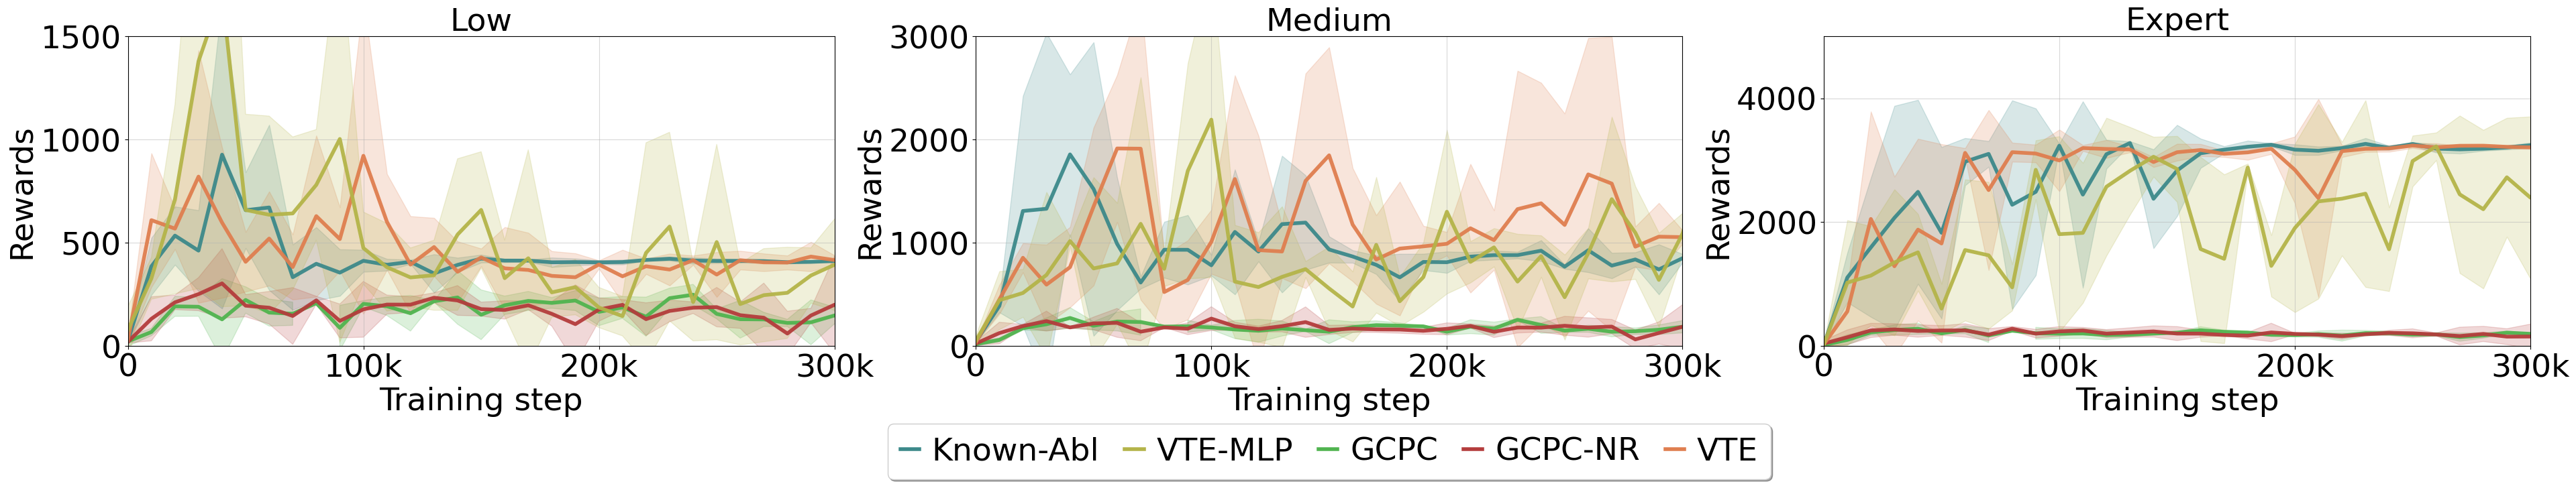

In [49]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

# hue_order = [
#     "offline",
#     "online",
#     "xpo",
#     "apl",
#     "sea"
# ]
methods_to_color = {
# Hopper Entries with softer contrasting colors
"Hopper": (223/255, 126/255, 79/255),  # RGBA with 0.15 alpha for lighter shadow
    "Hopper Dummy": (60/255, 137/255, 138/255),
    "Hopper Baseline": (180/255, 180/255, 73/255),

# GCPC Entries (if needed)
"GCPC": (80/255, 180/255, 79/255),          # Soft Brown color (Saddle Brown)
"GCPC-NR": (180/255, 60/255, 60/255),      # Soft Teal color (Teal)

}


fig, axes = plt.subplots(1, 3, sharey=False, figsize=(21, 6))
fig.set_figwidth(fig.get_figwidth() * 2.2)
# plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, wspace=0.4)

data_of_interest = []
data_of_interest.extend(jobs_gcpc[1])
data_of_interest.extend(jobs[2])
print(data_of_interest)
fontsize = 34
for i, ax in enumerate(axes):
    ax=sns.lineplot(data=df[df.run_name.isin(data_of_interest)], x="_step", y=f"eval/episode_reward_{i*10}", hue="run_name", alpha=.95, dashes=False,linewidth=4, errorbar=('se', 2), ax=ax,
    palette=methods_to_color,
    # err_style="bars"
    # hue_order=hue_order
                    )

    if i == 0:
        ax.set_title("Low", fontsize=fontsize)
        ax.set_xlim(0, 300000)
        ax.set_ylim(0, 1500)
        ax.set_xticks([100000*i for i in range(4)],
        ["0", "100k", "200k", "300k"], size=fontsize)

    elif i == 1:
        ax.set_title("Medium", fontsize=fontsize)
        ax.set_xlim(0, 300000)
        ax.set_ylim(0, 3000)
        ax.set_xticks([100000*i for i in range(4)],
        ["0", "100k", "200k", "300k"], size=fontsize)

    else:
        ax.set_title("Expert", fontsize=fontsize)
        ax.set_xlim(0, 300000)
        ax.set_ylim(0, 5000)
        ax.set_xticks([100000*i for i in range(4)],
        ["0", "100k", "200k", "300k"], size=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)  # Set y-tick label size
    # Ensure legend is created

    handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last axis
    # Create a mapping from original labels to desired labels
    label_mapping = {
        "Hopper": "VTE",
        "Hopper Dummy": "Known-Abl",
        "Hopper Baseline": "VTE-MLP",
        "Cheetah": "VTE",
        "Cheetah Dummy": "Known-Abl",
        "Cheetah Baseline": "VTE-MLP",
        "Walker": "VTE",
        "Walker Dummy": "Known-Abl",
        "Walker Baseline": "VTE-MLP",
        "GCPC": "GCPC",
        "GCPC-NR": "GCPC-NR"
    }
    if i == 1: 
        new_labels = [label_mapping.get(label, label) for label in labels]
        # Create a new order for the handles and labels based on the specified indices
        new_order = [1, 4, 0, 2, 3]  # Indices for [2, 5, 1, 3, 4]

        # Rearrange the handles and labels
        handles = [handles[i] for i in new_order]
        new_labels = [new_labels[i] for i in new_order]

        ax.legend(handles, new_labels , title='Methods', loc='upper center', ncol=4, handlelength=3)
        # ax.legend(legend,loc='upper center', bbox_to_anchor=(0.5, -0.1),
        #   fancybox=True, shadow=True, ncol=5, prop={'size': 50})
        # Additionally, ensure thicker legend lines with this loop:
        for legend_line in ax.get_legend().get_lines():
            legend_line.set_linewidth(4.0)  # Increase linewidth for better visibility
        sns.move_legend(
            ax, "upper center",
            # bbox_to_anchor=(0.45, -0.07), 
            ncol=5, 
            title=None, 
            frameon=True,
            # labels=[methods_to_labels[k] for k in hue_order],
            handletextpad=0.4,
            handlelength=0.6,
            columnspacing=0.8,
            bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, prop={'size': fontsize}
        )
    else:
        # remove legend:
        ax.get_legend().remove()
    ax.set_ylabel('Rewards', fontsize=fontsize)
    ax.set_xlabel('Training step', fontsize=fontsize)
    ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
fig.savefig("pdf/hopper_with_gcpc.pdf", bbox_inches="tight")

In [42]:
final_wr = df.groupby(["method", "seed"]).last()["eval/rm_win_rate_prob"].reset_index()
final_wr["inference"] = "policy"

KeyError: 'method'